# Proyek Analisis Data: Menyelesaikan Permasalahan Institusi Pendidikan
- **Nama:** Althaf Yudhistira
- **Email:** althafbanfsaj@gmail.com
- **ID Dicoding:** althafby

## Persiapan

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

## Menentukan Pertanyaan Bisnis

1. Bagaimana demografi mahasiswa yang ada pada kampus?
2. Berapa jumlah mahasiswa yang keluar dari kampus?
4. Apakah saja yang mempengaruhi keluarnya mahasiswa pada kampus?


### Menyiapkan library yang dibutuhkan

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import streamlit as st


### Menyiapkan data yang akan diguankan

data dapat di download pada tautan berikut: https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

In [2]:
df = pd.read_csv('data.csv',delimiter=';', on_bad_lines='skip')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Insight** : Melakukan Load data dari csv

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Detail kolom dataset:

    Marital status: The marital status of the student. -Application mode: The method of application used by the student.
    Application order: The order in which the student applied.
    Course: The course taken by the student.
    Daytime/evening attendance: Whether the student attends classes during the day or in the evening.
    Previous qualification: The qualification obtained by the student before enrolling in higher education. -Previous qualification (grade): Grade of previous qualification (between 0 and 200)
    Nacionality: The nationality of the student.
    Mother's qualification: The qualification of the student's mother.
    Father's qualification: The qualification of the student's father.
    Mother's occupation: The occupation of the student's mother.
    Father's occupation: The occupation of the student's father.
    Admission grade: Admission grade (between 0 and 200)
    Displaced: Whether the student is a displaced person.
    Educational special needs: Whether the student has any special educational needs.
    Debtor: Whether the student is a debtor.
    Gender: The gender of the student.
    Scholarship holder: Whether the student is a scholarship holder.
    Age at enrollment: The age of the student at the time of enrollment.
    International: Whether the student is an international student.
    Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester.
    Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester.
    Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester.
    Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester.


In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


**Insight** : Melakukan analisis dekriptif dari dataframe yang telah diload

In [5]:
df.nunique()

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

**Insight** : Melakukan cek jumlah varietas yang tersedia dari dataframe

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'Marital_status': [1 2 4 3 5 6]
Column 'Application_mode': [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Column 'Application_order': [5 1 2 4 3 6 9 0]
Column 'Course': [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Column 'Daytime_evening_attendance': [1 0]
Column 'Previous_qualification': [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Column 'Previous_qualification_grade': [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7

**Insight** : Melakukan cek varietas yang tersedia dari dataframe


In [7]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

**Insight** : Melakukan cek jumlah sebaran data pada masing-masing kelas yang tersedia dari dataframe

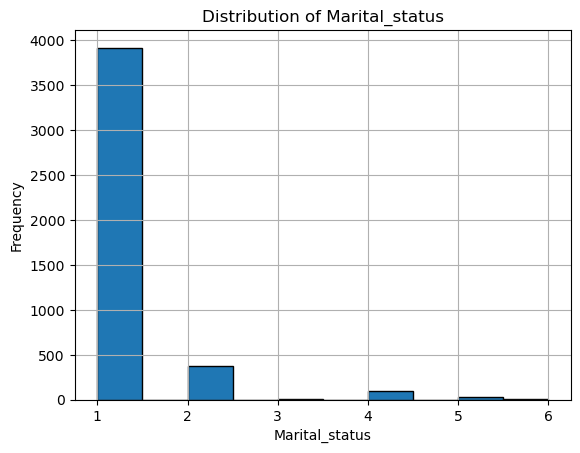

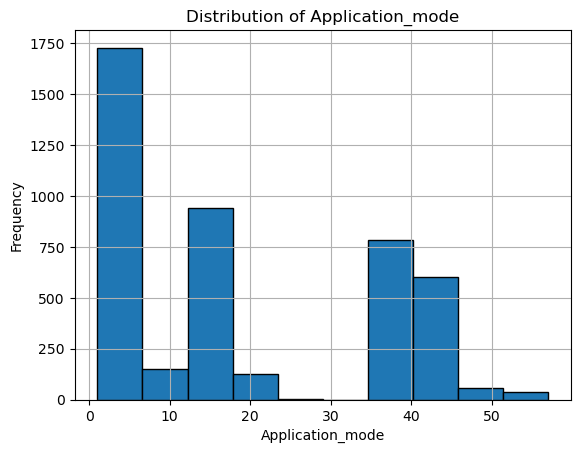

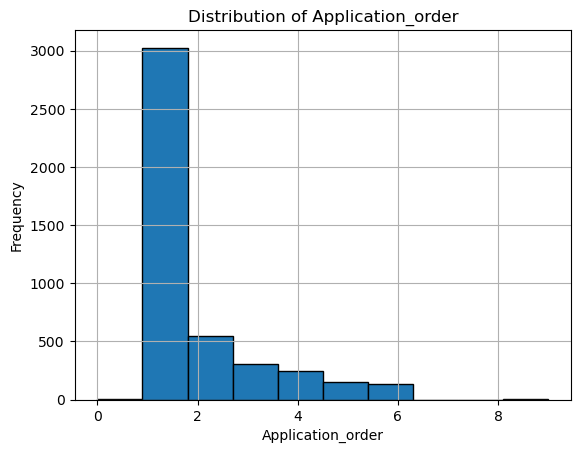

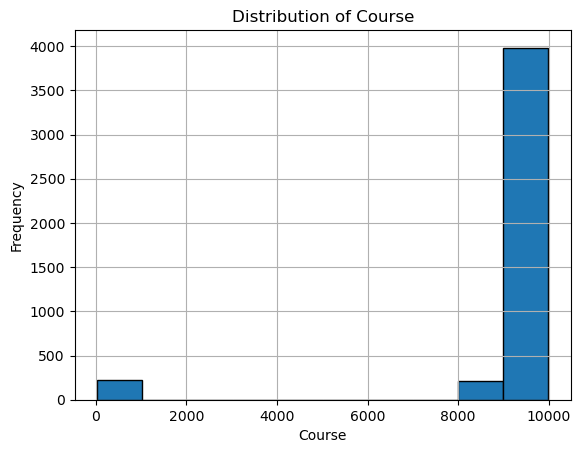

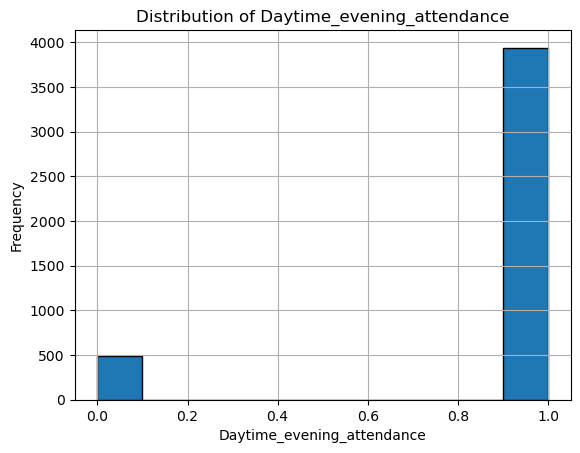

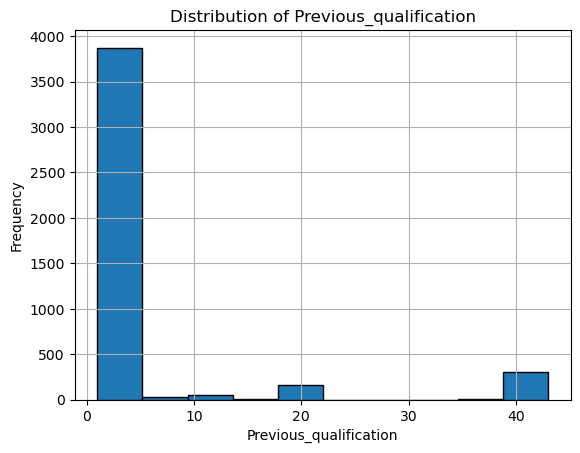

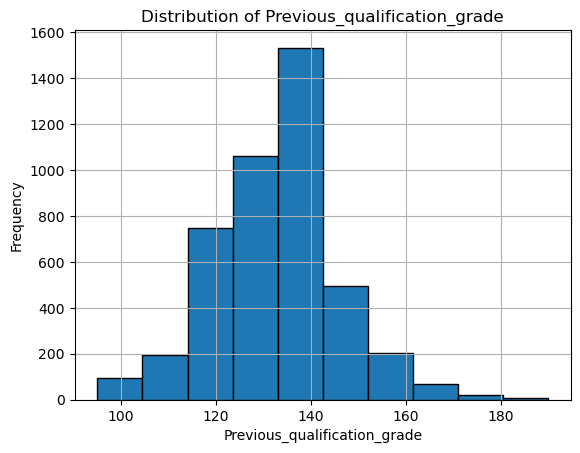

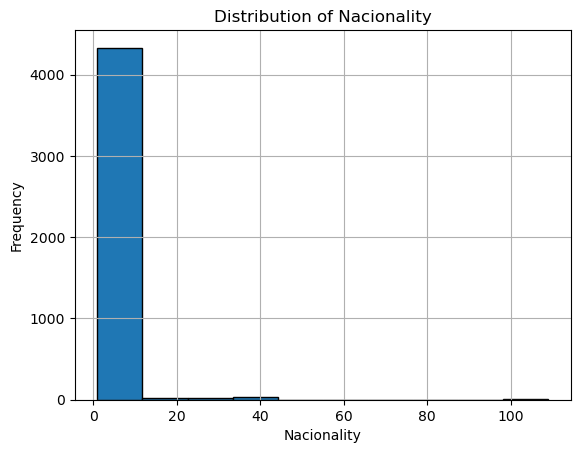

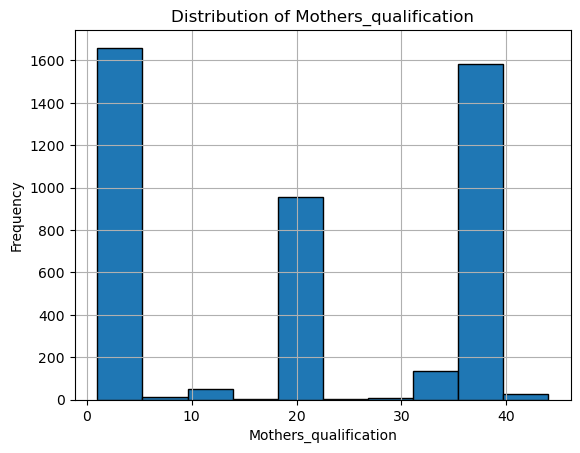

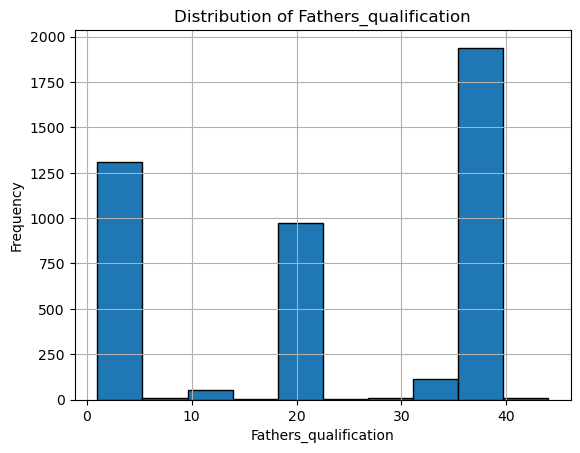

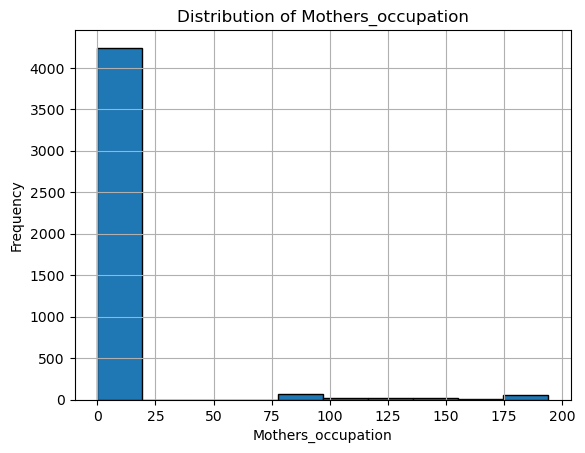

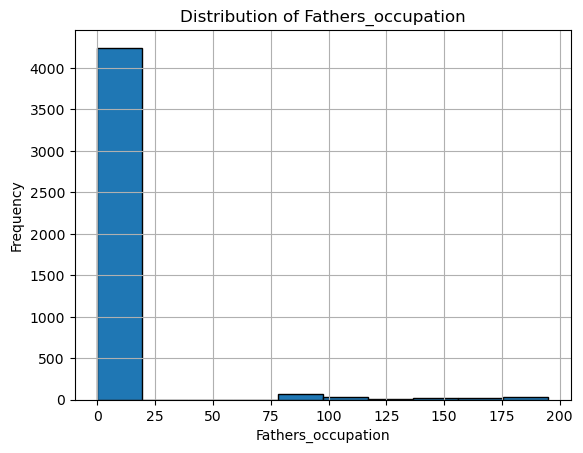

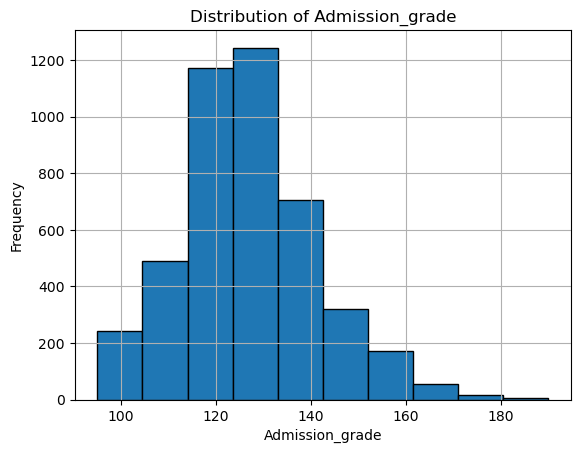

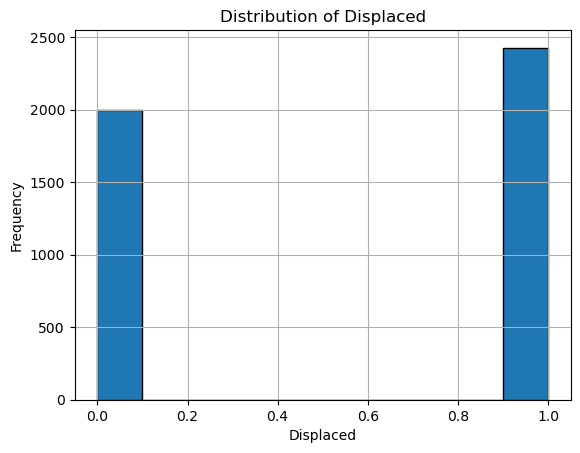

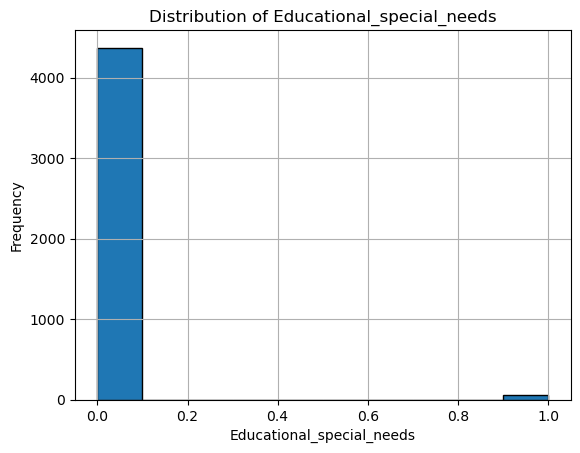

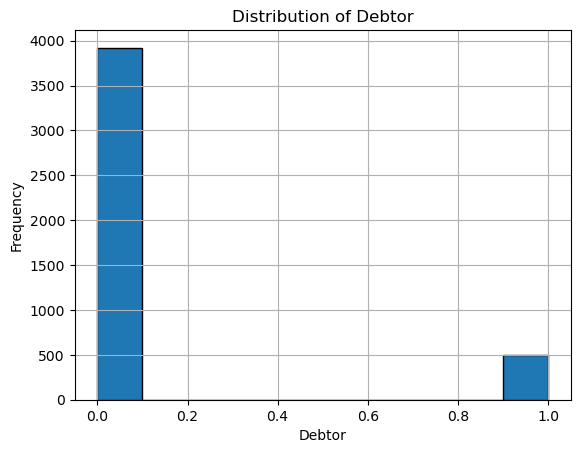

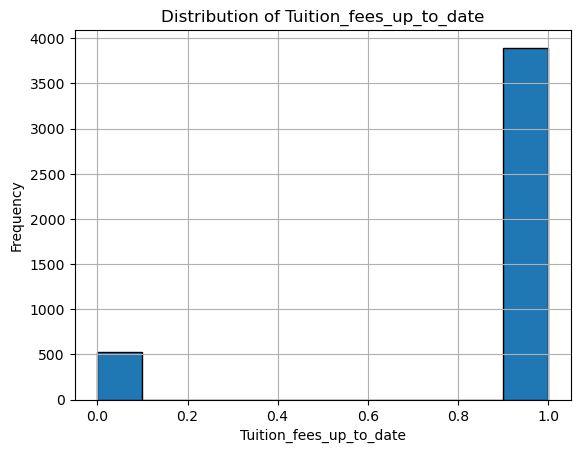

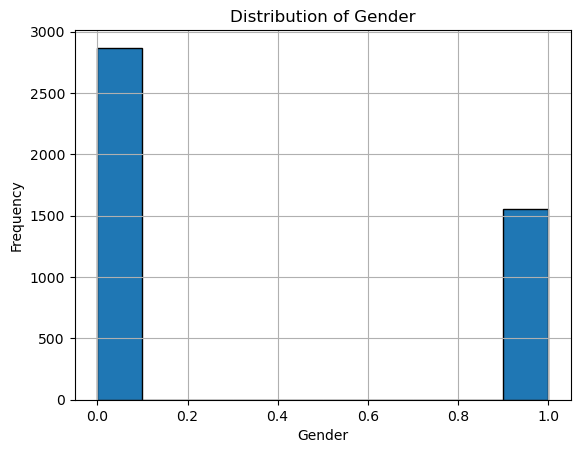

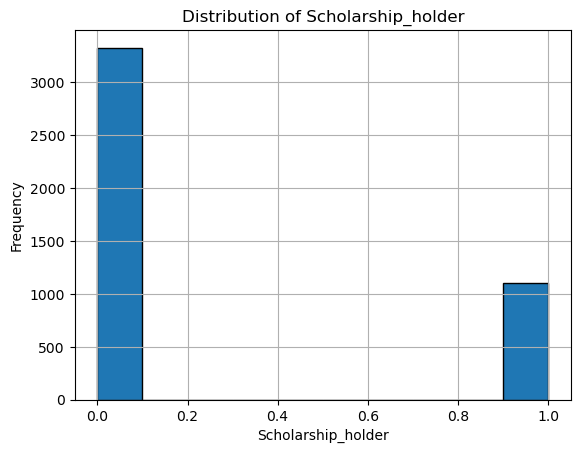

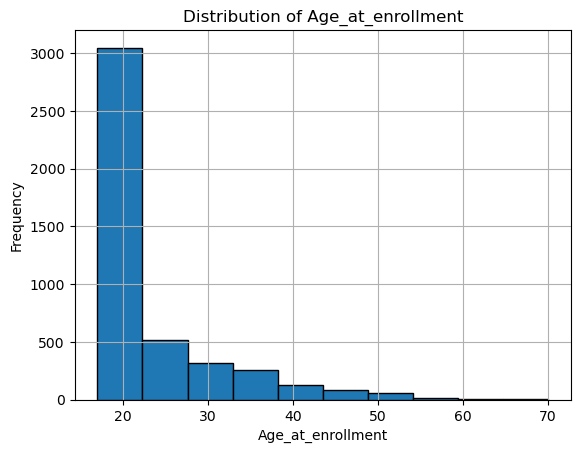

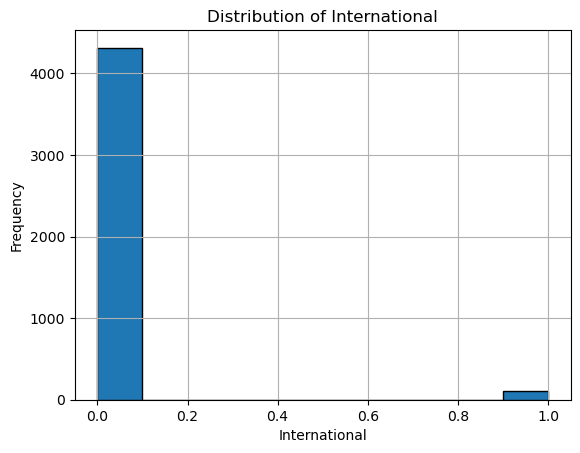

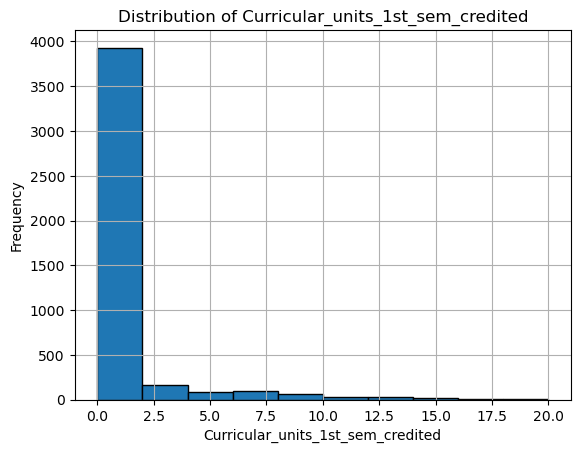

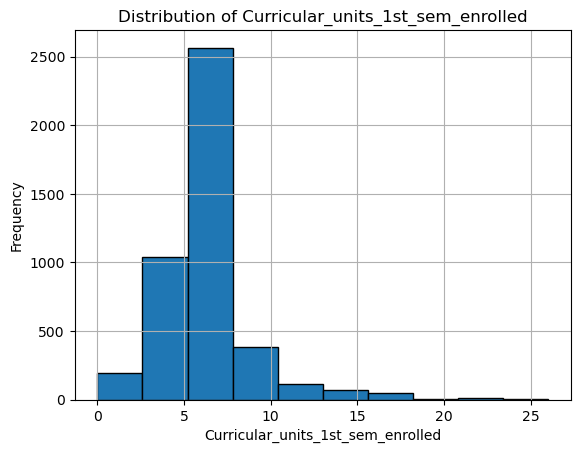

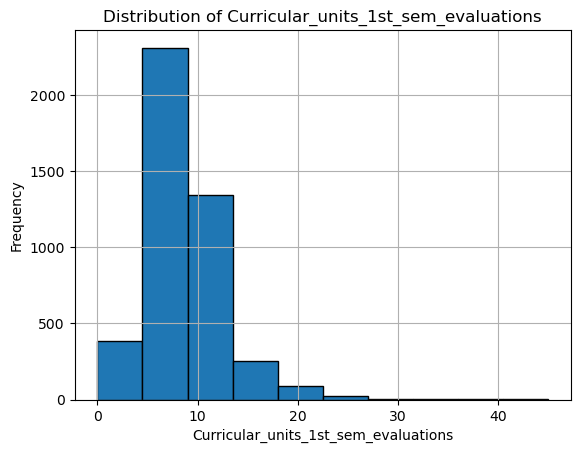

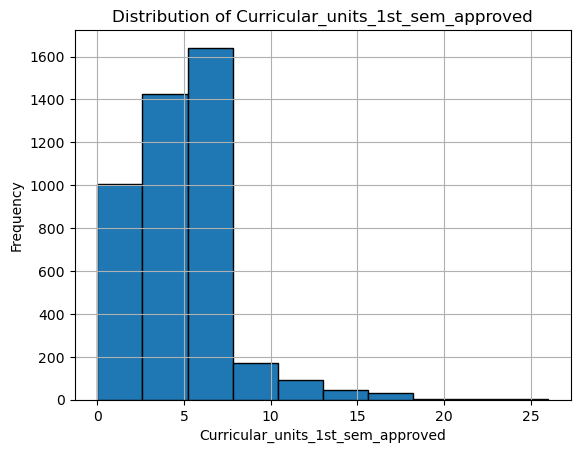

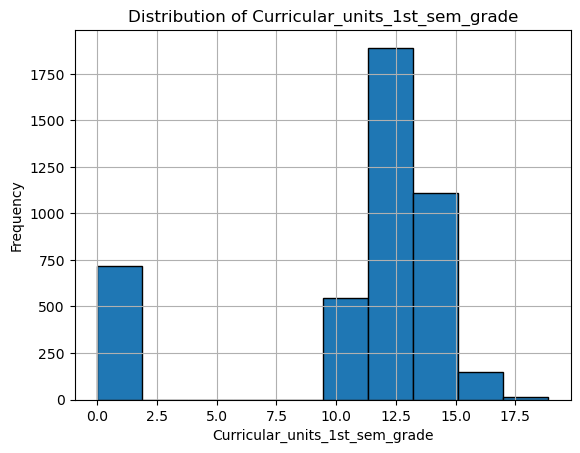

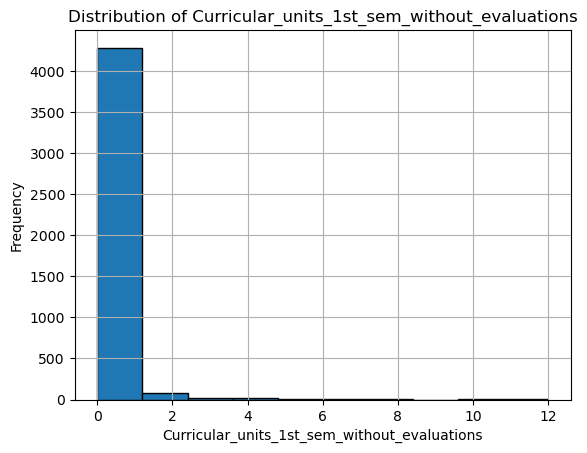

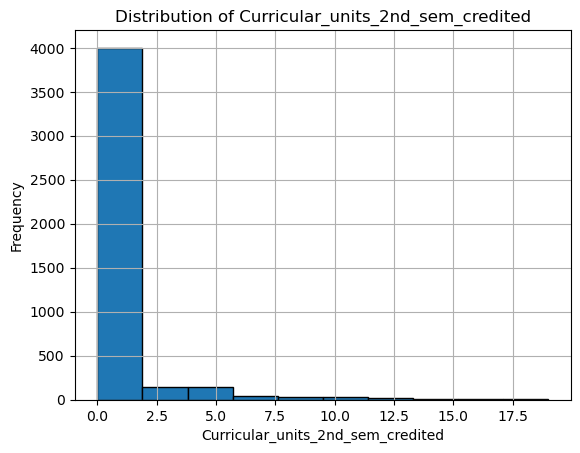

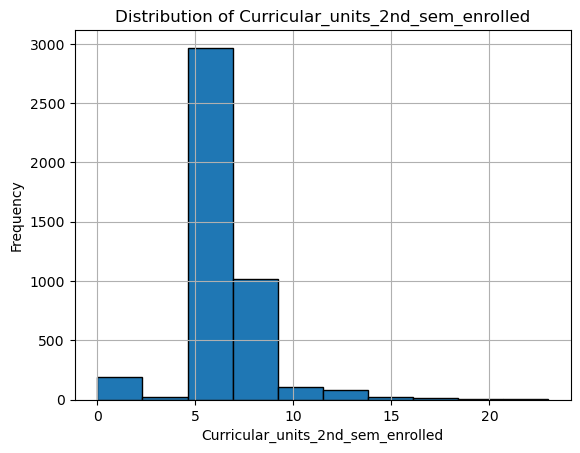

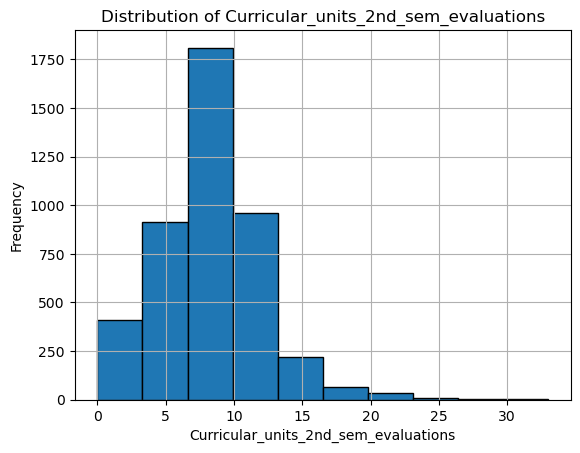

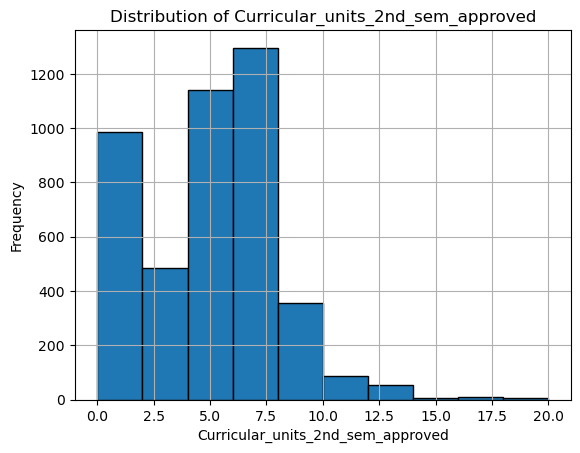

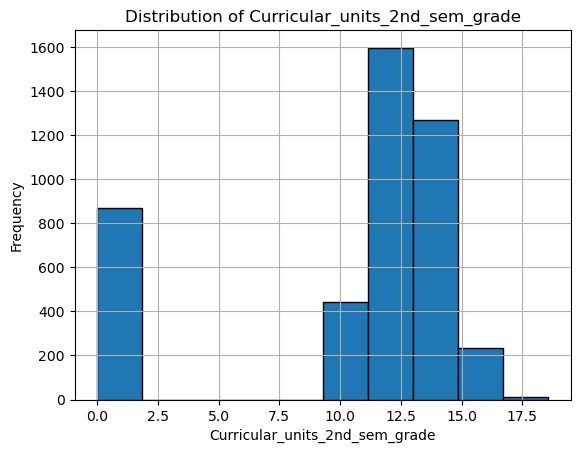

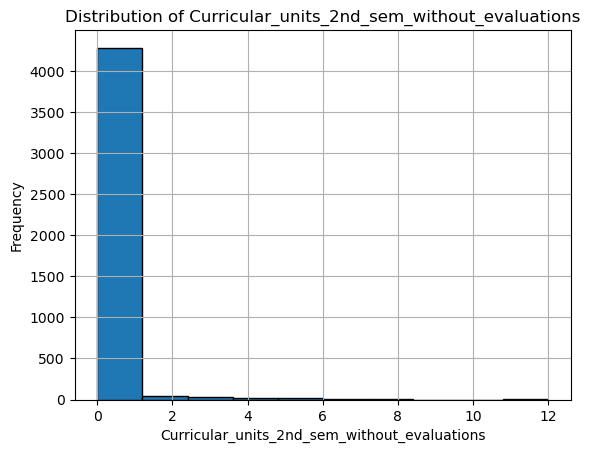

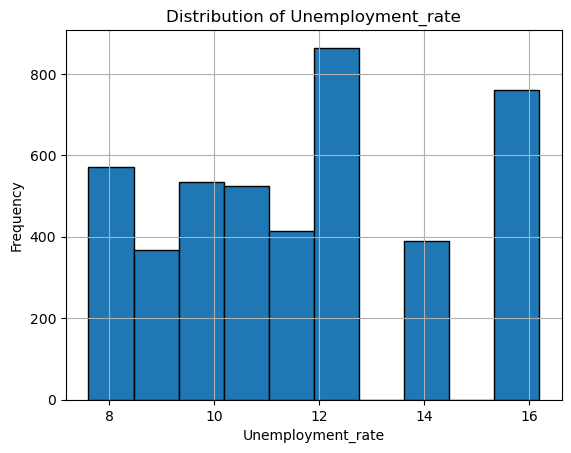

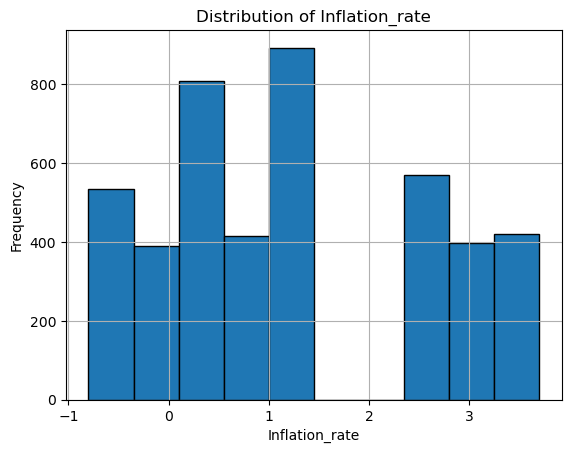

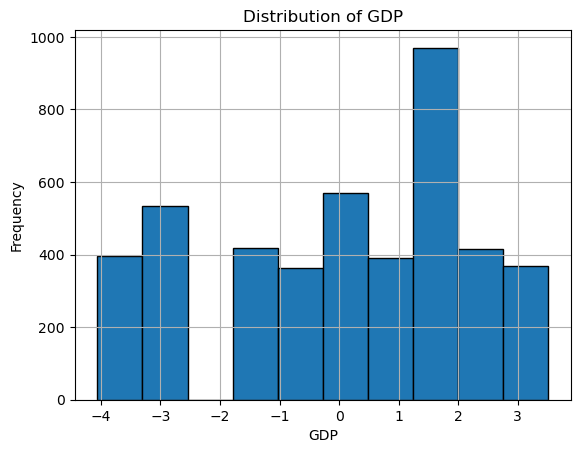

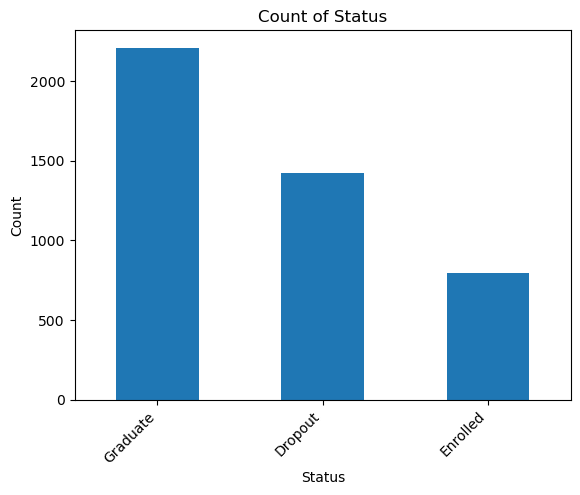

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    df[col].hist(edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot.bar()
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

**Insight** : Melakukan cek karakterisitik dan sebaran data 

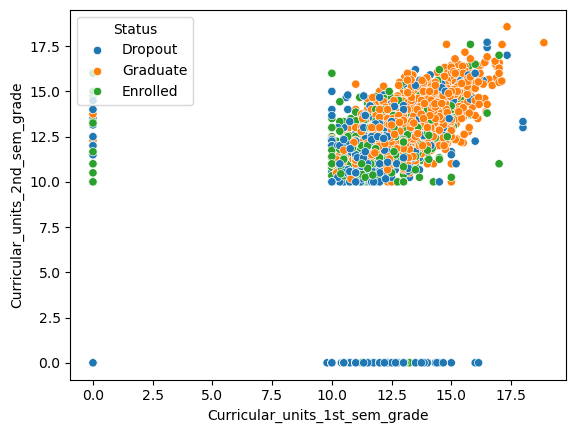

In [ ]:
sns.scatterplot(x='Curricular_units_1st_sem_grade', y='Curricular_units_2nd_sem_grade', hue='Status', data=df)
plt.show()

**Insight** : Melakukan analisis bivariate 

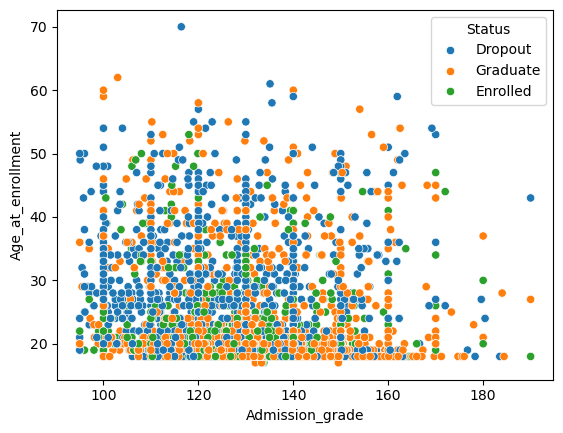

In [ ]:
sns.scatterplot(x='Admission_grade', y='Age_at_enrollment', hue='Status', data=df)
plt.show()

**Insight** : Melakukan analisis bivariate 

In [ ]:
df['Status'] = df['Status'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 1})

**Insight** : Melakukan pelabelan ulang dari string ke int dan penggabungan kelas Graduate ke Enrolled karena tujuan dari program ini hanya untuk mengetahui siswa yang Dropout dan tidak.

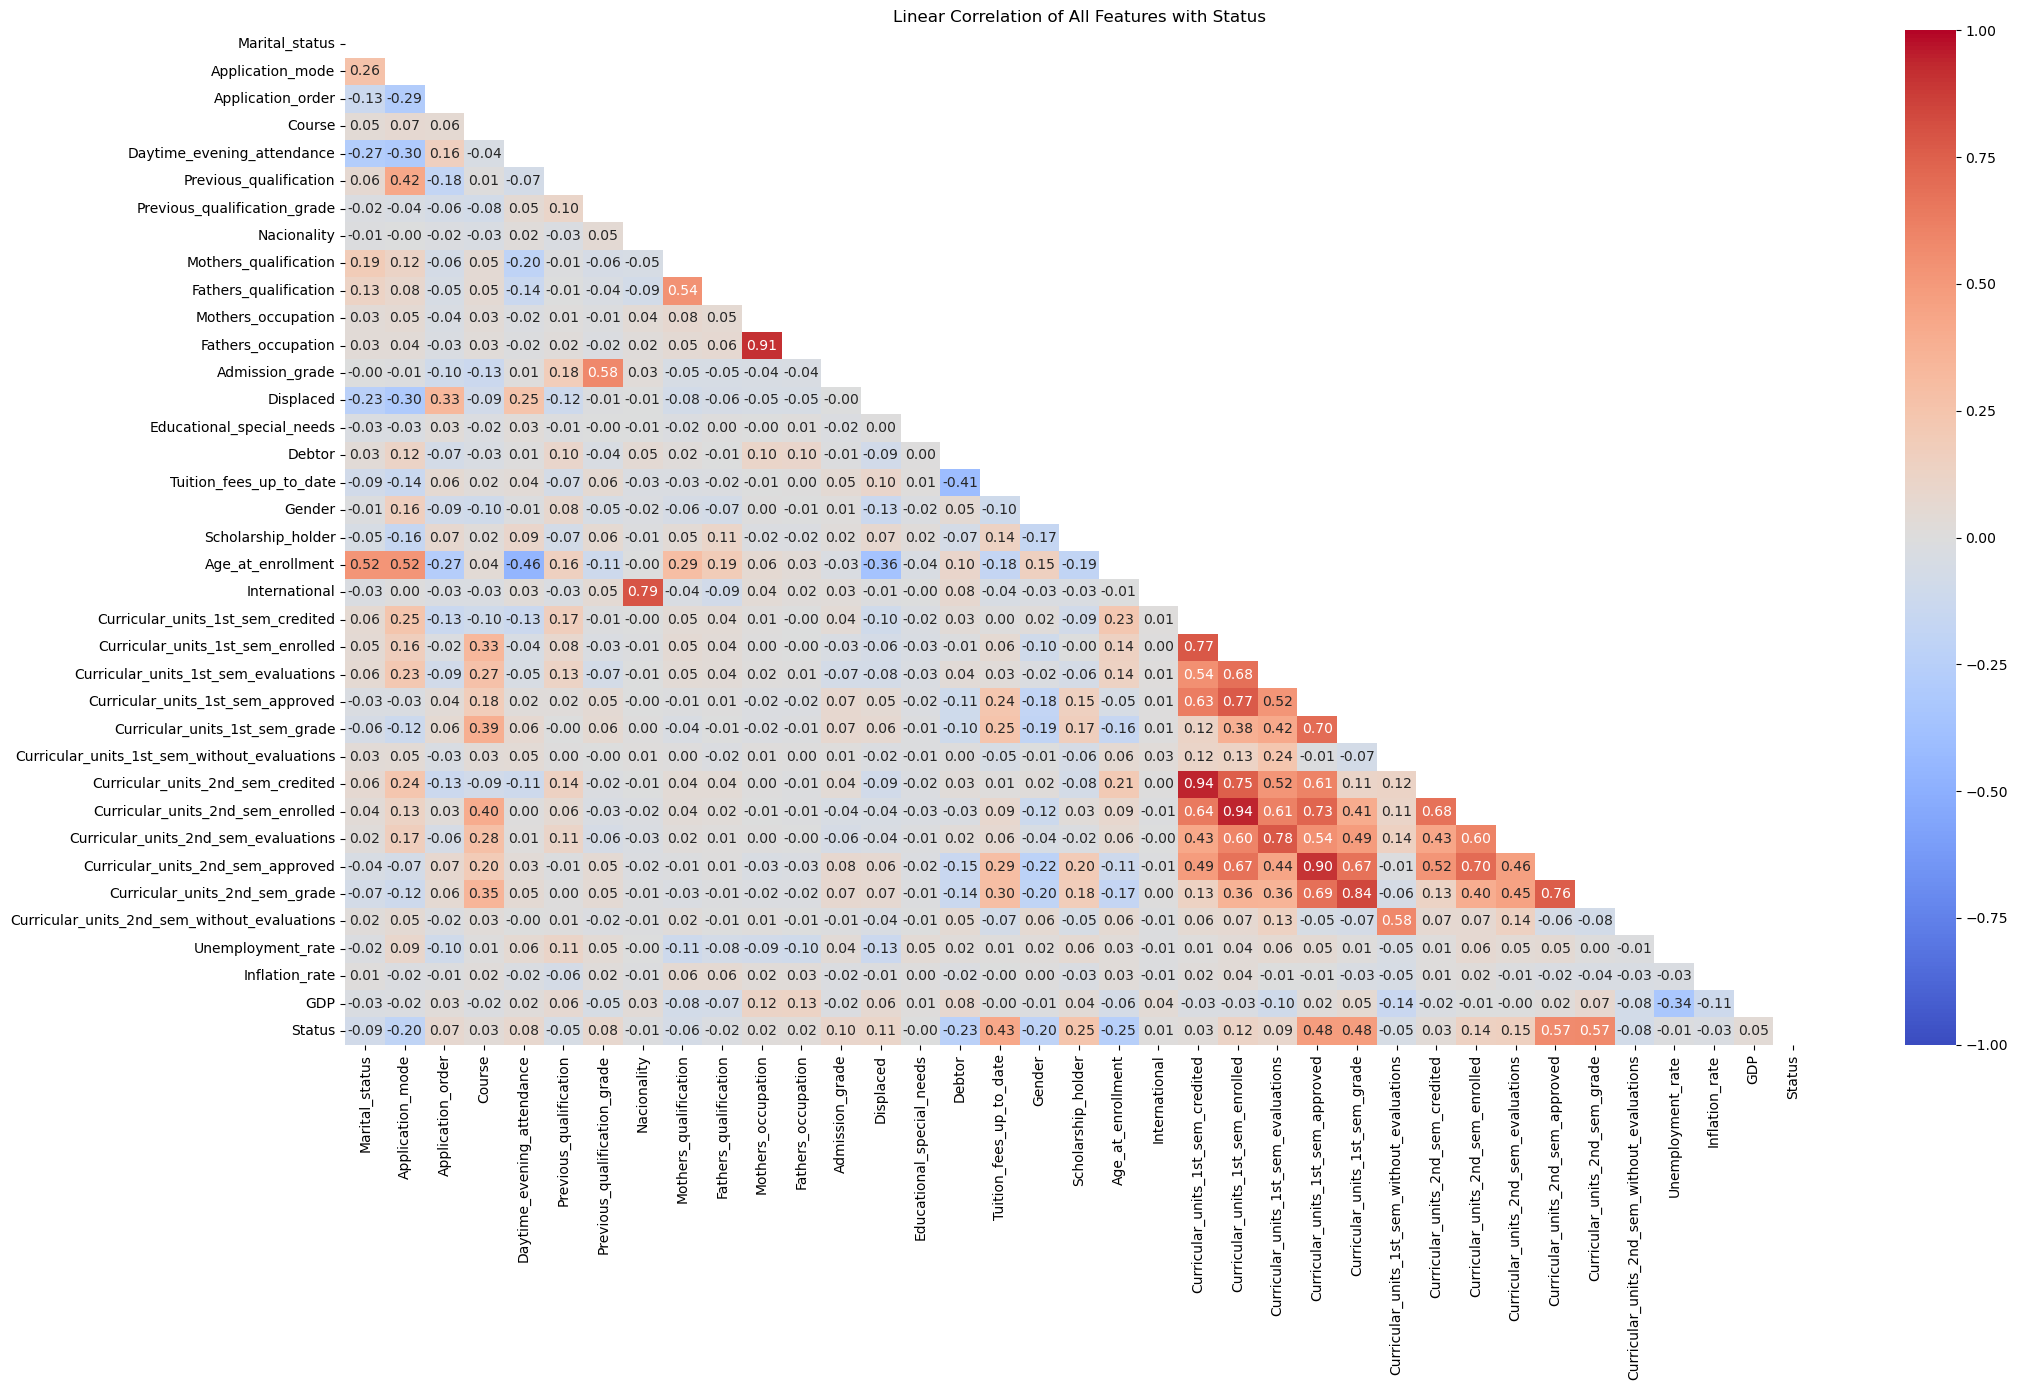

In [ ]:
corr=df.corr()
plt.figure(figsize=(22, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,fmt=".2f", mask =np.triu(np.ones_like(corr, dtype=bool)))

plt.title('Linear Correlation of All Features with Status')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight** : Melakukan analisis korelasi dengan metode multivariate dengan menggunakan heatmap

## Data Preparation / Preprocessing

In [8]:
df.isna().sum()


Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Insight** : Melakukan cek missing values yang tersedia dari dataframe

In [9]:
df.duplicated().sum()

0

**Insight** : Melakukan cek data duplikasi yang tersedia dari dataframe


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insight** : Melakukan cek uulang apakah tipe data status sudah berganti


In [12]:
df['Status'].value_counts()

Status
1    3003
0    1421
Name: count, dtype: int64

**Insight** : Melakukan cek japakah jumlah data masing2 kelas sudah terupdate


In [13]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.678797
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


**Insight** : Melakukan analisis dekriptif dari dataframe yang telah diload

### Korelasi Status terhadap fitur lain

**Menggunakan Metode Correlation Matrix**

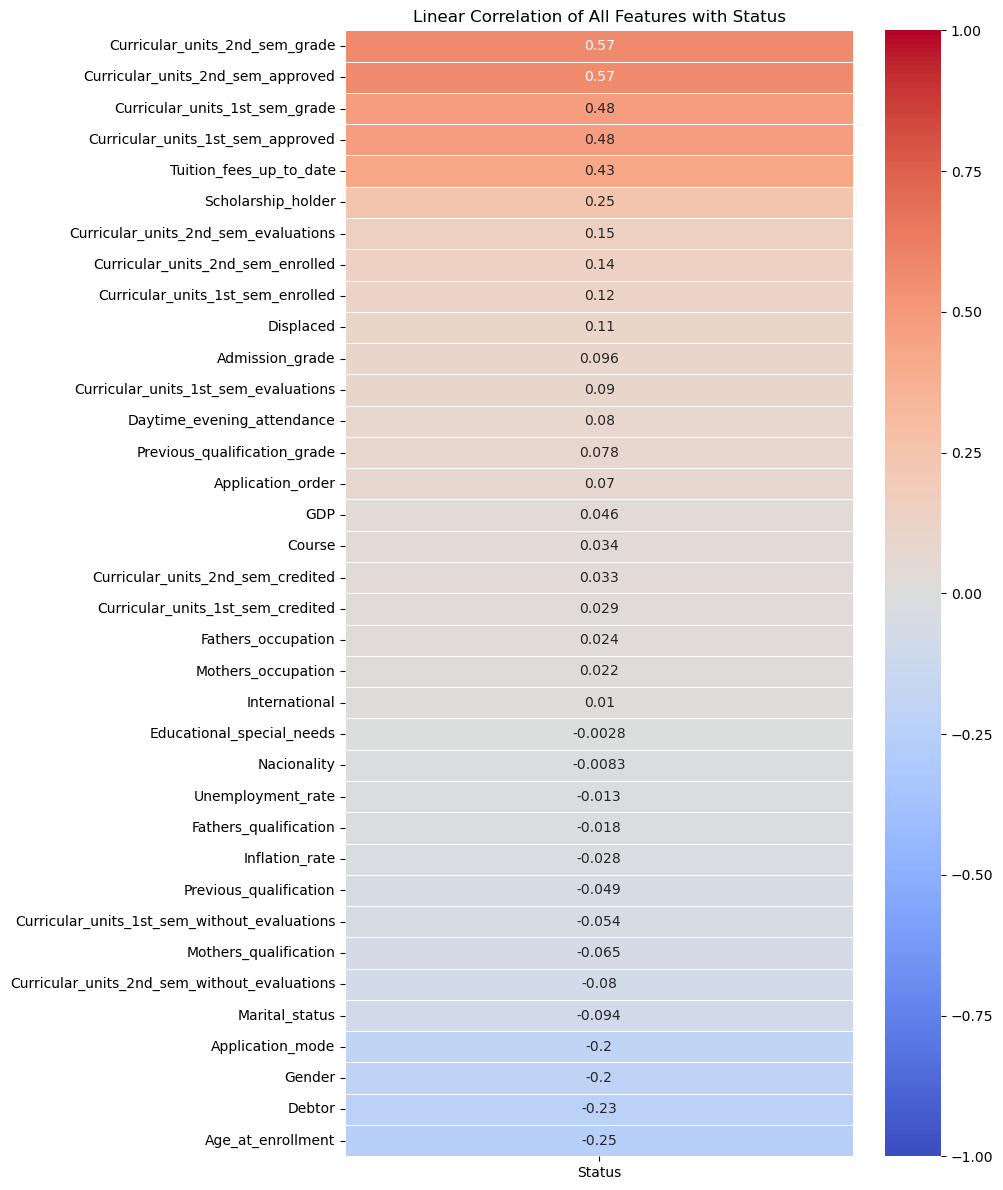

In [14]:
attrition_corr = df.corr()[['Status']].sort_values(by='Status', ascending=False)
attrition_corr = attrition_corr.drop('Status')


plt.figure(figsize=(10, 12))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Linear Correlation of All Features with Status')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight** : Melakukan analisis dengan mencari korelasi secara linier terhadap kolom yang ada dengan kolom status

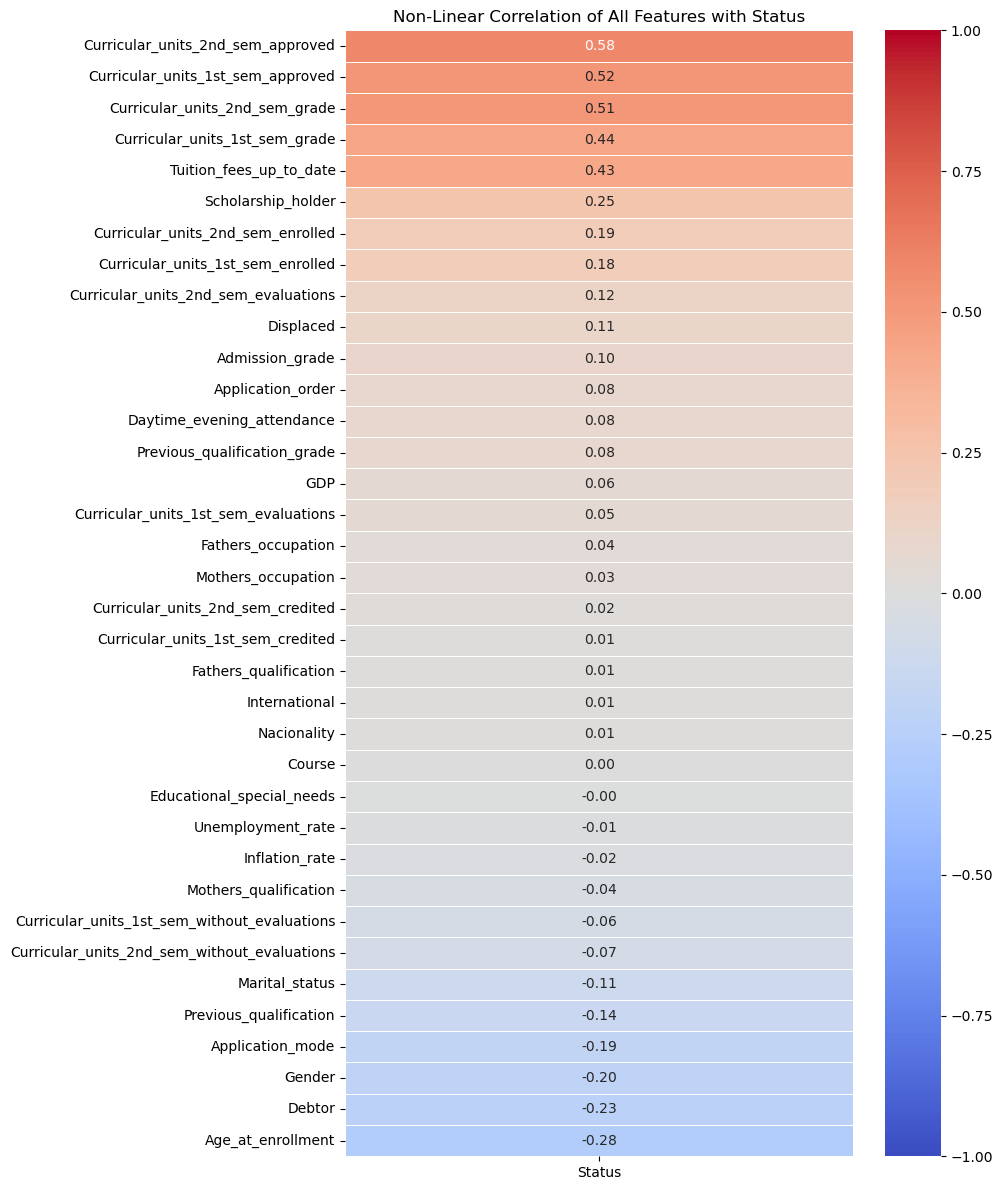

In [15]:
attrition_corr = df.corr(method='spearman')[['Status']].sort_values(by='Status', ascending=False)
attrition_corr = attrition_corr.drop('Status')

plt.figure(figsize=(10, 12))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Non-Linear Correlation of All Features with Status')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight** : Melakukan analisis dengan mencari korelasi secara non-linier terhadap kolom yang ada dengan kolom status


## Modeling untuk menentukan fitur yang akan ditampilkan pada Tableau

**Menggunakan Machine Learning untuk Menemukan Importance Features**

C:\Users\Emesi\AppData\Local\Temp\ipykernel_7464\795607636.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


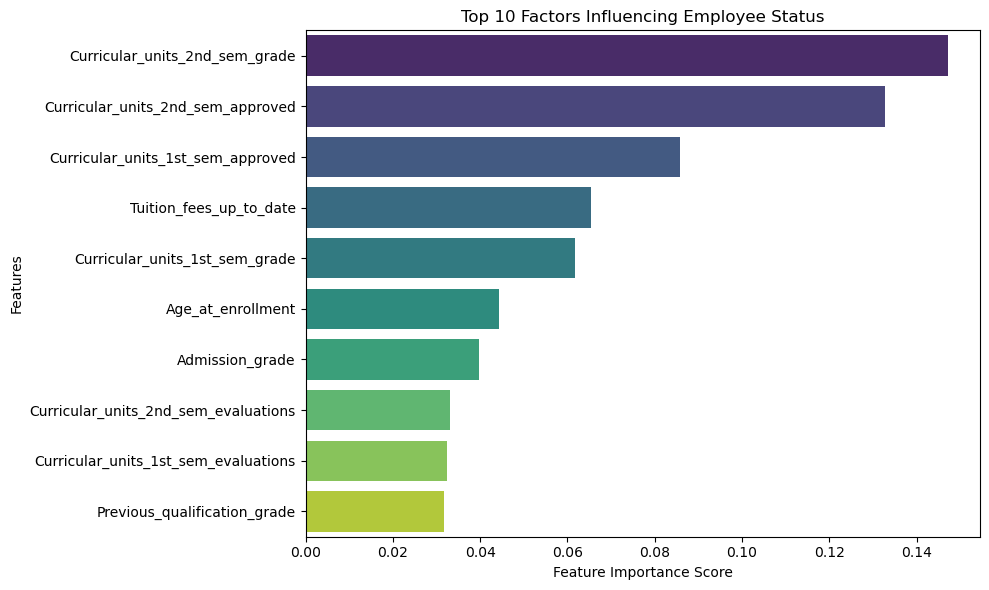

In [16]:
X = df.drop("Status", axis=1)
y = df["Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.title("Top 10 Factors Influencing Employee Status")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


**Insight** : Melakukan analisis dengan mencari korelasi dengan metode feature importance menggunakan random forest terhadap kolom yang ada dengan kolom status


In [17]:
print(feature_importances[:15])

Curricular_units_2nd_sem_grade          0.147141
Curricular_units_2nd_sem_approved       0.132802
Curricular_units_1st_sem_approved       0.085711
Tuition_fees_up_to_date                 0.065482
Curricular_units_1st_sem_grade          0.061625
Age_at_enrollment                       0.044415
Admission_grade                         0.039684
Curricular_units_2nd_sem_evaluations    0.033115
Curricular_units_1st_sem_evaluations    0.032487
Previous_qualification_grade            0.031817
Course                                  0.029640
Fathers_occupation                      0.025017
Curricular_units_2nd_sem_enrolled       0.024303
Mothers_occupation                      0.022831
Curricular_units_1st_sem_enrolled       0.022664
dtype: float64


**Insight** : hasil analisis metode feature importance dimana 15 fitur yang paling berkorelasi dekat dengan status


In [18]:
pearson_corr = df.corr(method='pearson')['Status'].drop('Status')
spearman_corr = df.corr(method='spearman')['Status'].drop('Status')

corr_comparison = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Difference': pearson_corr - spearman_corr
}).sort_values(by='Spearman', ascending=False)
print(corr_comparison[:15])


                                       Pearson  Spearman    Difference
Curricular_units_2nd_sem_approved     0.569500  0.581523 -1.202286e-02
Curricular_units_1st_sem_approved     0.479112  0.522881 -4.376934e-02
Curricular_units_2nd_sem_grade        0.571792  0.510023  6.176943e-02
Curricular_units_1st_sem_grade        0.480669  0.442631  3.803815e-02
Tuition_fees_up_to_date               0.429149  0.429149  1.665335e-16
Scholarship_holder                    0.245354  0.245354  1.387779e-16
Curricular_units_2nd_sem_enrolled     0.141515  0.188312 -4.679710e-02
Curricular_units_1st_sem_enrolled     0.124635  0.180101 -5.546624e-02
Curricular_units_2nd_sem_evaluations  0.154999  0.119206  3.579265e-02
Displaced                             0.107232  0.107232  3.053113e-16
Admission_grade                       0.095806  0.098572 -2.766213e-03
Application_order                     0.070485  0.082924 -1.243820e-02
Daytime_evening_attendance            0.080499  0.080499  2.220446e-16
Previo

**Insight** : hasil analisis metode linier dan non-linier dimana 15 fitur yang paling berkorelasi dekat dengan status


**Kolom yang mempengaruhi Status Berdasar Correlation Matrix, Random Forest, dan Domain Knowledge :** 
1. Curricular_units_2nd_sem_grade
2. Curricular_units_1st_sem_grade 
3. Tuition_fees_up_to_date
4. Admission_grade
5. Previous_qualification_grade          
6. Debtor
7. Fathers_occupation
8. Mothers_occupation                   
9. Age_at_enrollment
10. Scholarship_holder


### Modeling Untuk Simulasi pada Streamlit

In [19]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


model = RandomForestClassifier( class_weight='balanced',random_state=42)
sm = SMOTE( random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)
model.fit(X_res, y_res)



y_pred = model.predict(X_test)

print(classification_report(
    y_test, y_pred,
    target_names=['Dropout', 'Enrolled']  
))


print(confusion_matrix(y_test, y_pred))

c:\Users\Emesi\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.79       427
    Enrolled       0.89      0.92      0.91       901

    accuracy                           0.87      1328
   macro avg       0.85      0.84      0.85      1328
weighted avg       0.87      0.87      0.87      1328

[[328  99]
 [ 74 827]]


In [20]:
joblib.dump(model, 'student_predict.pkl')


['student_predict.pkl']

**Insight** : menyimpan model agar model siap dideploy


In [21]:
!pip install -U pip
!pip freeze > requirements.txt

**Insight** : menyimpan depedencies yang ada pada notebook
